In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

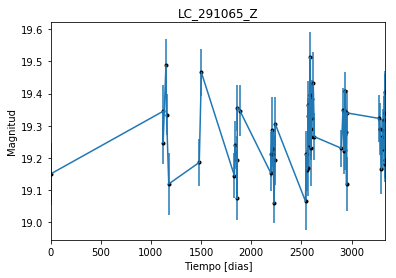

In [2]:
data = np.genfromtxt('LC_291065_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_291065_Z')
plt.savefig("LC_291065_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

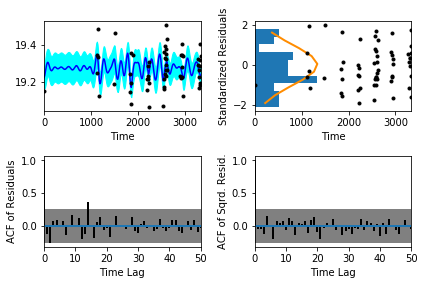

In [5]:
sample.assess_fit()

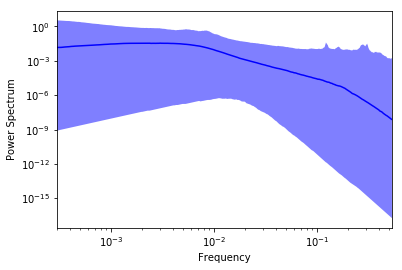

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

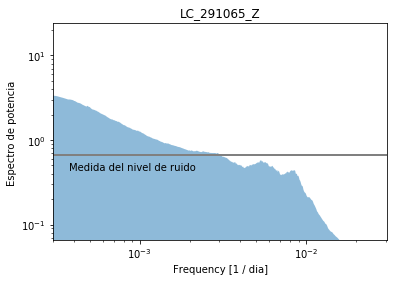

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_291065_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_291065_Z')

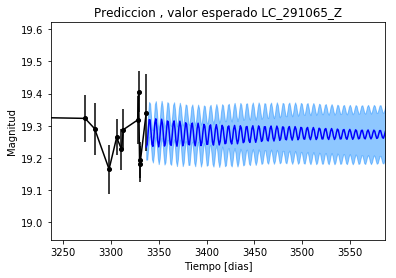

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_291065_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_291065_Z')

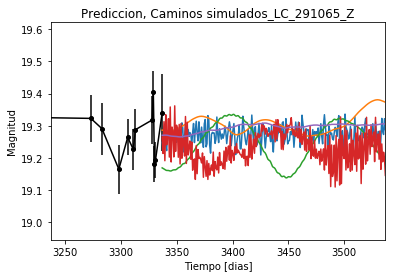

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_291065_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


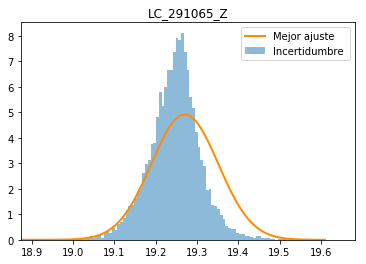

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_291065_Z')
plt.savefig("Mejor_ajuste_LC_285764_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_291065_Z')

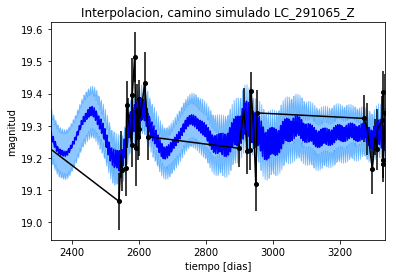

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_291065_Z')

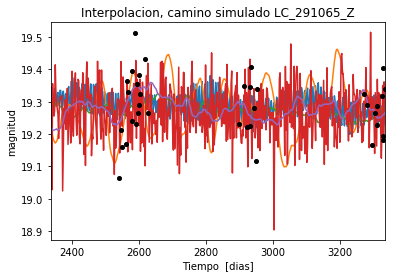

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 887.932677821
Median: 0.00744121290873
Standard deviation: 0.176554058519
68% credibility interval: [ 0.00080334  0.13415526]
95% credibility interval: [  3.41888715e-04   7.16711684e-01]
99% credibility interval: [  3.10043436e-04   9.47854978e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 778.329856321
Median: 0.00399132191799
Standard deviation: 0.130730661509
68% credibility interval: [ 0.00069357  0.05925427]
95% credibility interval: [  3.33470781e-04   4.91262013e-01]
99% credibility interval: [  3.07550797e-04   8.64393043e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 501.075245856
Median: 0.0217283637126

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1195.57737033
Median: 78.3509420887
Standard deviation: 1.72038407875
68% credibility interval: [ 76.60640569  79.80014724]
95% credibility interval: [ 74.26464121  81.17279263]
99% credibility interval: [ 72.36223477  81.6923213 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 439.864601465
Median: 0.797874278315
Standard deviation: 2.5198153327
68% credibility interval: [ 0.05580854  4.22364488]
95% credibility interval: [ 0.01344546  8.45269048]
99% credibility interval: [  9.45023060e-03   1.23410313e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 626.85102534
Median: 1.77283812616
Standard deviation: 15.3024387719
68% credibility interval: [  0.04845642  18.44342444]
95% credibility interval: [  2.24

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 657.644819246
Median: 8.50693275308e-16
Standard deviation: 1.69165272463e+74
68% credibility interval: [  2.39354279e-55   1.12771330e+46]
95% credibility interval: [  6.79096068e-178   2.50808987e+068]
99% credibility interval: [  6.60076793e-196   4.92430558e+072]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2122.25333277
Median: 19.2640793862
Standard deviation: 0.0213618742417
68% credibility interval: [ 19.24502112  19.27990057]
95% credibility interval: [ 19.21725401  19.29861234]
99% credibility interval: [ 19.18449103  19.32059772]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 411.790330151
Median: 0.129346870899
Standard deviation: 0.289054597263
68% credibility interval: [ 0.00253251  0.60317558]
95% credibility interval: [ 0.          0.95744227]
99% credibility interval: [ 0.          1.04474678]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 411.790330151
Median: 0.129346870899
Standard deviation: 0.289054597263
68% credibility interval: [ 0.00253251  0.60317558]
95% credibility interval: [ 0.          0.95744227]
99% credibility interval: [ 0.          1.04474678]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 187.915936489
Median: 0.0
Standard deviation: 0.121319562811
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1195.57737033
Median: 78.3509420887
Standard deviation: 1.72038407875
68% credibility interval: [ 76.60640569  79.80014724]
95% credibility interval: [ 74.26464121  81.17279263]
99% credibility interval: [ 72.36223477  81.6923213 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2267.48775025
Median: 0.00336943722872
Standard deviation: 0.00361695246004
68% credibility interval: [ 0.00127161  0.00676499]
95% credibility interval: [ 0.00017672  0.01234924]
99% credibility interval: [  8.86839857e-06   2.01996680e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 434.458981727
Median: 1.2697492739
Standard deviation: 0.233453465028
68% credibility interval: [ 1.04088122  1.50922769]
95% credibility interval: [ 0.8369137   1.75624029]
99% credibility interval: [ 0.72504726  1.89565762]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 591.217286771
Median: 1.73273913027e-05
Standard deviation: 1.66904785503
68% credibility interval: [  1.86566408e-49   6.35382511e-02]
95% credibility interval: [  7.90131379e-71   3.09378669e+00]
99% credibility interval: [  7.55367548e-76   1.31648548e+01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 887.932677821
Median: (-0.0467545196157-0.792591653596j)
Standard deviation: 2.12817242411
68% credibility interval: [-0.84292234-0.66817584j -0.00504756-0.04233851j]
95% credibility interval: [ -4.50323233e+00-0.01393517j  -2.14815015e-03-0.29700422j]
99% credibility interval: [ -5.95554847e+00-5.07086318j  -1.94806036e-03-0.02380326j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 778.329856321
Median: (-0.0250782152313+4.02376541384j)
Standard deviation: 1.99329601184
68% credibility interval: [-0.37230555+1.27743616j -0.00435784+0.44785912j]
95% credibility interval: [ -3.08669026e+00 +4.89557316e+00j  -2.09525871e-03 +2.01630363e-03j]
99% credibility interval: [ -5.43114166e+00+5.53658256j  -1.93239865e-03+0.j   